In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
# Równe płatności

In [3]:
freq = 12
rate = 0.0675
years = 30
pv = 200000

rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq

In [4]:
periods = np.arange(1,nper+1,dtype=int)

In [5]:
interest_equal = - np.around(npf.ipmt(rate,periods,nper,pv),2)
interest_equal[:10]

array([1125.  , 1124.03, 1123.06, 1122.08, 1121.09, 1120.1 , 1119.11,
       1118.1 , 1117.1 , 1116.08])

In [6]:
# Raty malejące

In [7]:
np.set_printoptions(suppress=True)
principal_decreasing = np.around(np.zeros(nper)+(pv/nper),2)
principal_decreasing[:10]

array([555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56,
       555.56, 555.56])

In [8]:
balance = np.zeros(nper) + pv
balance_close = np.around(balance - np.cumsum(principal_decreasing),2)
balance_close[[0,1,2,-3,-2,-1]]

array([199444.44, 198888.88, 198333.32,   1109.52,    553.96,     -1.6 ])

In [9]:
np.cumsum(principal_decreasing)[:10]

array([ 555.56, 1111.12, 1666.68, 2222.24, 2777.8 , 3333.36, 3888.92,
       4444.48, 5000.04, 5555.6 ])

In [10]:
balance_open = balance_close + principal_decreasing

In [11]:
interest_decreasing = np.around(balance_open * rate,2)
interest_decreasing[:10]

array([1125.  , 1121.87, 1118.75, 1115.62, 1112.5 , 1109.37, 1106.25,
       1103.12, 1100.  , 1096.87])

In [12]:
print("Wartość odsetek do zapłaty w wariancie kredytu w równych ratach wynosi: " + str("{:.2f}".format(interest_equal.sum())))
print("Wartość odsetek do zapłaty w wariancie kredytu w ratach malejących wynosi: " + str("{:.2f}".format(interest_decreasing.sum())))

Wartość odsetek do zapłaty w wariancie kredytu w równych ratach wynosi: 266990.60
Wartość odsetek do zapłaty w wariancie kredytu w ratach malejących wynosi: 203060.81


Text(0, 0.5, 'Skumulowana wartość odsetek')

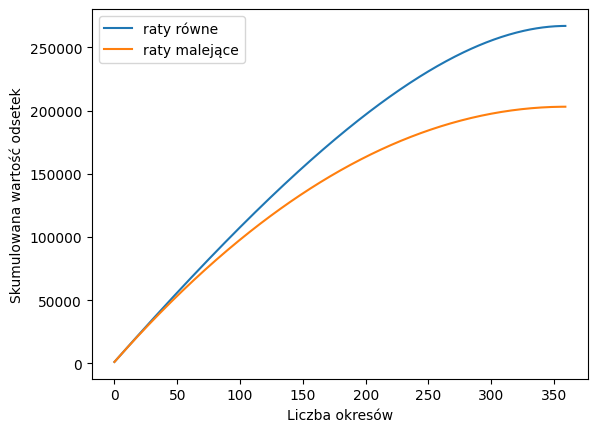

In [13]:
plt.plot(interest_equal.cumsum(),label='raty równe')
plt.plot(interest_decreasing.cumsum(),label='raty malejące')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość odsetek')